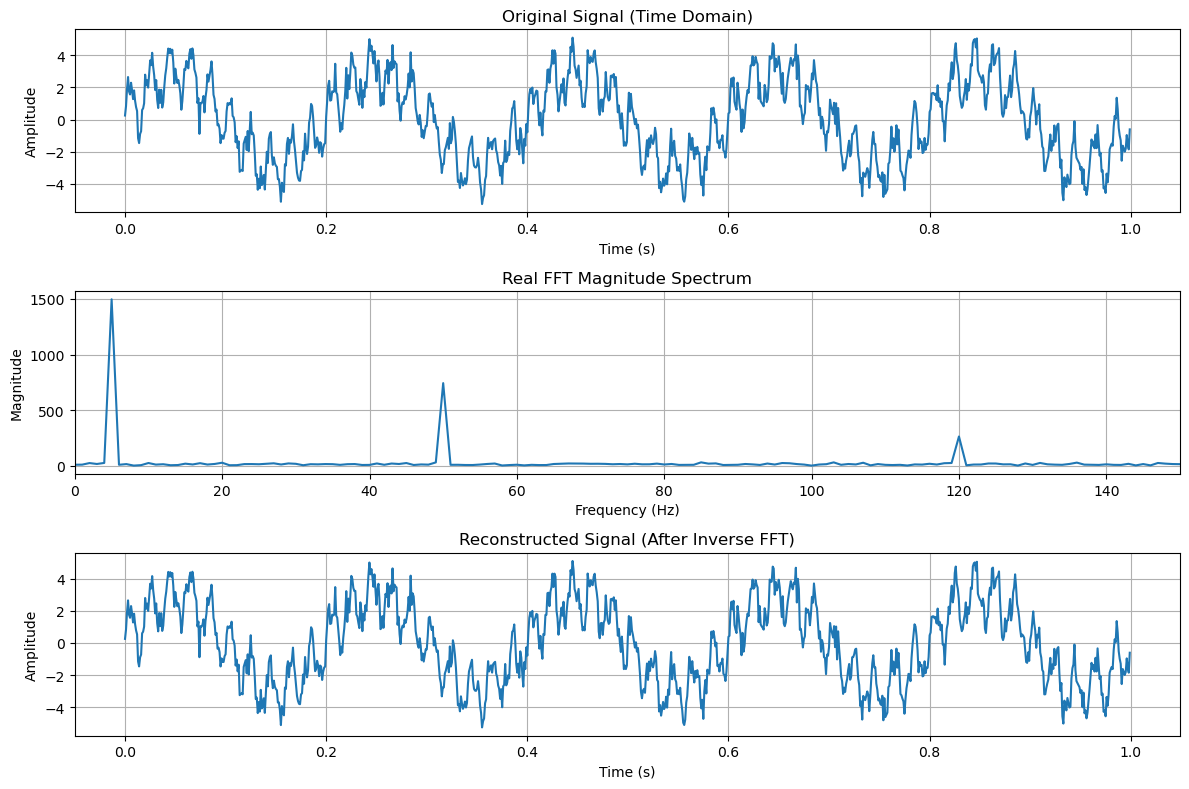

Mean squared error between original and reconstructed signal: 0.0000000000

Dominant frequency components:
Frequency: 5.00 Hz, Magnitude: 1497.03
Frequency: 50.00 Hz, Magnitude: 743.53
Frequency: 120.00 Hz, Magnitude: 263.65


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a sample signal with multiple frequency components
sample_rate = 1000  # 1000 Hz sampling rate
duration = 1.0      # 1 second duration
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Create a signal with 3 frequency components: 5 Hz, 50 Hz, and 120 Hz
signal = (
    3 * np.sin(2 * np.pi * 5 * t) +      # 5 Hz component
    1.5 * np.sin(2 * np.pi * 50 * t) +   # 50 Hz component
    0.5 * np.sin(2 * np.pi * 120 * t)    # 120 Hz component
)

# Add some noise
np.random.seed(42)
signal += 0.5 * np.random.normal(size=len(t))

# Compute the real FFT
real_fft = np.fft.rfft(signal)
fft_magnitude = np.abs(real_fft)  # Get magnitude of frequency components

# Calculate frequency values for plotting
freq = np.fft.rfftfreq(len(signal), 1/sample_rate)

# Inverse FFT to reconstruct the signal
reconstructed_signal = np.fft.irfft(real_fft)

# Plotting
plt.figure(figsize=(12, 8))

# Original signal
plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal (Time Domain)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# FFT magnitude spectrum
plt.subplot(3, 1, 2)
plt.plot(freq, fft_magnitude)
plt.title('Real FFT Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 150)  # Limit x-axis to show our frequencies of interest

# Reconstructed signal
plt.subplot(3, 1, 3)
plt.plot(t, reconstructed_signal)
plt.title('Reconstructed Signal (After Inverse FFT)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# Verify how well the reconstruction worked
error = np.mean((signal - reconstructed_signal) ** 2)
print(f"Mean squared error between original and reconstructed signal: {error:.10f}")

# We can also examine specific frequency components
peak_indices = np.argsort(fft_magnitude)[-3:]  # Get indices of 3 largest peaks
print("\nDominant frequency components:")
for idx in sorted(peak_indices):
    print(f"Frequency: {freq[idx]:.2f} Hz, Magnitude: {fft_magnitude[idx]:.2f}")



### In this example:

1. We create a synthetic signal with three known frequency components (5 Hz, 50 Hz, and 120 Hz) plus some random noise.

2. We apply the real FFT (`np.fft.rfft`) to analyze the frequency content of the signal.

3. We then perform the inverse FFT (`np.fft.irfft`) to reconstruct the original signal.

4. We visualize:
   - The original time-domain signal
   - The frequency spectrum showing the magnitude of each frequency component
   - The reconstructed signal after inverse FFT

5. Finally, we calculate the error between the original and reconstructed signals and identify the dominant frequency components.

When you run this code, you'll see that:
- The FFT spectrum clearly shows peaks at our three input frequencies (5, 50, and 120 Hz)
- The reconstructed signal is virtually identical to the original
- The mean squared error is extremely small (nearly zero)

This demonstrates the lossless nature of the FFT/IFFT process when used properly, and shows how the real FFT can be used to identify frequency components in a signal even when noise is present.